<a href="https://colab.research.google.com/github/RoyMakary/Python-Projects/blob/main/Nasa_Software_defect_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competetion
---
## Description


Software defect prediction is crucial for NASA because it helps identify potential issues in spacecraft systems early in the development lifecycle. Detecting and addressing defects before deployment can prevent mission failures, ensure astronaut safety, and save costs associated with rework and maintenance. By employing predictive analytics, NASA can enhance the reliability and performance of its software systems, ultimately contributing to the success of space missions.

With 21 explanatory variables describing (almost) every aspect of software testing, this competition challenges you to identify the defect-prone modules from the non-defect-prone modules (Defect, Y).

## Evaluation


### Goal:

Your job is to identify the defect-prone and non-defect-prone modules for each instance of the test dataset. For each Index in the test set, you must predict the value [0, 1] of the Defect variable.

### Metric:

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

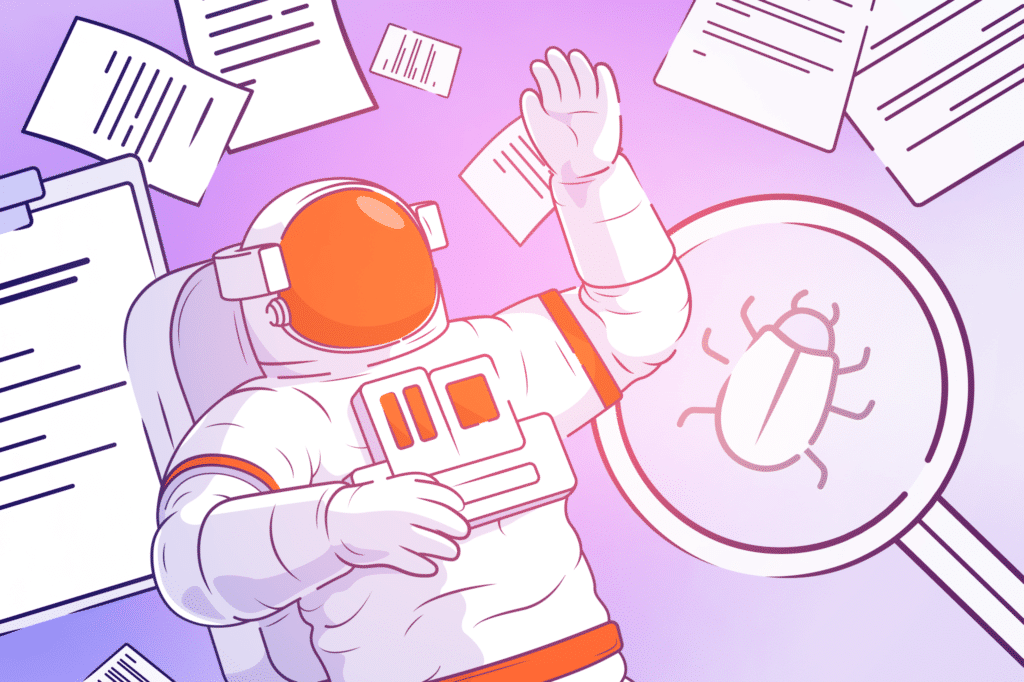

In [ ]:
from IPython.display import Image, display
image_path_1 = '/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Image.png'
display(Image(filename=image_path_1))

## Nasa software defect prediction

### Let's first import the necessary libraries

In [46]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from math import log
import seaborn as sns
import pandas as pd
import seaborn as sns # for visuals
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na") #get rid of some warnings
warnings.filterwarnings("ignore") #get rid of some warnings

In [30]:
# Let's load the data ;)
train_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Features.csv')
train_output_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Output.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Test_Features.csv')
train_df['Defect'] = train_output_df['Defect'] # add the defect column in our training data frame

In [ ]:
train_df.head()

,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defect
0,0,0,3,0,0,2,2,1,5,17.08,...,18,0.29,11.63,59.79,3,15,3,7,7,1
1,1,1,1,0,0,1,1,1,8,28.00,...,21,0.33,14.00,84.00,10,11,10,6,14,0
2,2,0,1,0,0,1,1,1,0,7.74,...,5,0.67,0.97,11.61,2,3,2,3,2,0
3,3,0,1,0,2,1,1,1,4,6.67,...,10,0.22,7.50,30.00,3,7,2,6,8,0
4,4,2,3,1,3,2,2,1,14,30.86,...,36,0.21,37.33,144.00,12,24,9,7,22,0


In [ ]:
# Let's check the total number of columns and rows of our data set
train_df.shape

(1676, 23)

In [ ]:
# Let's check if there are any missing values in our data set:
train_df.isnull().sum()

Index                    0
LOC_BLANK                0
BRANCH_COUNT             0
LOC_CODE_AND_COMMENT     0
LOC_COMMENTS             0
CYCLOMATIC_COMPLEXITY    0
DESIGN_COMPLEXITY        0
ESSENTIAL_COMPLEXITY     0
LOC_EXECUTABLE           0
HALSTEAD_CONTENT         0
HALSTEAD_DIFFICULTY      0
HALSTEAD_EFFORT          0
HALSTEAD_ERROR_EST       0
HALSTEAD_LENGTH          0
HALSTEAD_LEVEL           0
HALSTEAD_PROG_TIME       0
HALSTEAD_VOLUME          0
NUM_OPERANDS             0
NUM_OPERATORS            0
NUM_UNIQUE_OPERANDS      0
NUM_UNIQUE_OPERATORS     0
LOC_TOTAL                0
Defect                   0
dtype: int64

In [ ]:
# Great we have no missing values, let's check the number of unique values:
train_df.nunique()

Index                    1676
LOC_BLANK                  30
BRANCH_COUNT               41
LOC_CODE_AND_COMMENT       11
LOC_COMMENTS               28
CYCLOMATIC_COMPLEXITY      29
DESIGN_COMPLEXITY          24
ESSENTIAL_COMPLEXITY       19
LOC_EXECUTABLE            115
HALSTEAD_CONTENT          762
HALSTEAD_DIFFICULTY       469
HALSTEAD_EFFORT           807
HALSTEAD_ERROR_EST         88
HALSTEAD_LENGTH           259
HALSTEAD_LEVEL             50
HALSTEAD_PROG_TIME        794
HALSTEAD_VOLUME           622
NUM_OPERANDS              146
NUM_OPERATORS             193
NUM_UNIQUE_OPERANDS        70
NUM_UNIQUE_OPERATORS       33
LOC_TOTAL                 131
Defect                      2
dtype: int64

In [ ]:
# Let's check the type of each feature:
train_df.dtypes

Index                      int64
LOC_BLANK                  int64
BRANCH_COUNT               int64
LOC_CODE_AND_COMMENT       int64
LOC_COMMENTS               int64
CYCLOMATIC_COMPLEXITY      int64
DESIGN_COMPLEXITY          int64
ESSENTIAL_COMPLEXITY       int64
LOC_EXECUTABLE             int64
HALSTEAD_CONTENT         float64
HALSTEAD_DIFFICULTY      float64
HALSTEAD_EFFORT          float64
HALSTEAD_ERROR_EST       float64
HALSTEAD_LENGTH            int64
HALSTEAD_LEVEL           float64
HALSTEAD_PROG_TIME       float64
HALSTEAD_VOLUME          float64
NUM_OPERANDS               int64
NUM_OPERATORS              int64
NUM_UNIQUE_OPERANDS        int64
NUM_UNIQUE_OPERATORS       int64
LOC_TOTAL                  int64
Defect                     int64
dtype: object

In [ ]:
# Let's get the usual mathematical characteristics of our data:
train_df.describe()

,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defect
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,837.500000,1.801313,4.766706,0.124702,0.939141,2.887232,2.594869,1.701074,14.931384,21.696814,...,51.071599,0.318461,301.096223,266.368329,19.255370,31.816229,9.770883,7.754773,20.713007,0.155131
std,483.963842,3.791021,7.998350,0.690636,3.144651,4.001469,3.494295,2.240634,25.118051,21.920083,...,86.028837,0.315008,1001.372829,535.124561,32.964592,53.323039,12.485216,5.747950,30.808052,0.362138
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,418.750000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.800000,...,4.750000,0.080000,0.670000,9.500000,1.000000,3.000000,1.000000,3.000000,4.000000,0.000000
50%,837.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,14.565000,...,17.000000,0.200000,12.710000,59.500000,6.000000,10.000000,5.000000,6.000000,9.000000,0.000000
75%,1256.250000,2.000000,5.000000,0.000000,0.000000,3.000000,3.000000,1.000000,17.000000,30.090000,...,58.000000,0.500000,127.090000,267.795000,22.000000,36.000000,14.000000,11.000000,24.000000,0.000000
max,1675.000000,35.000000,89.000000,12.000000,44.000000,45.000000,45.000000,26.000000,262.000000,193.060000,...,1106.000000,2.000000,18044.640000,7918.820000,428.000000,678.000000,120.000000,37.000000,288.000000,1.000000


## Visualization

Let's visualize the data before applying any data correction:

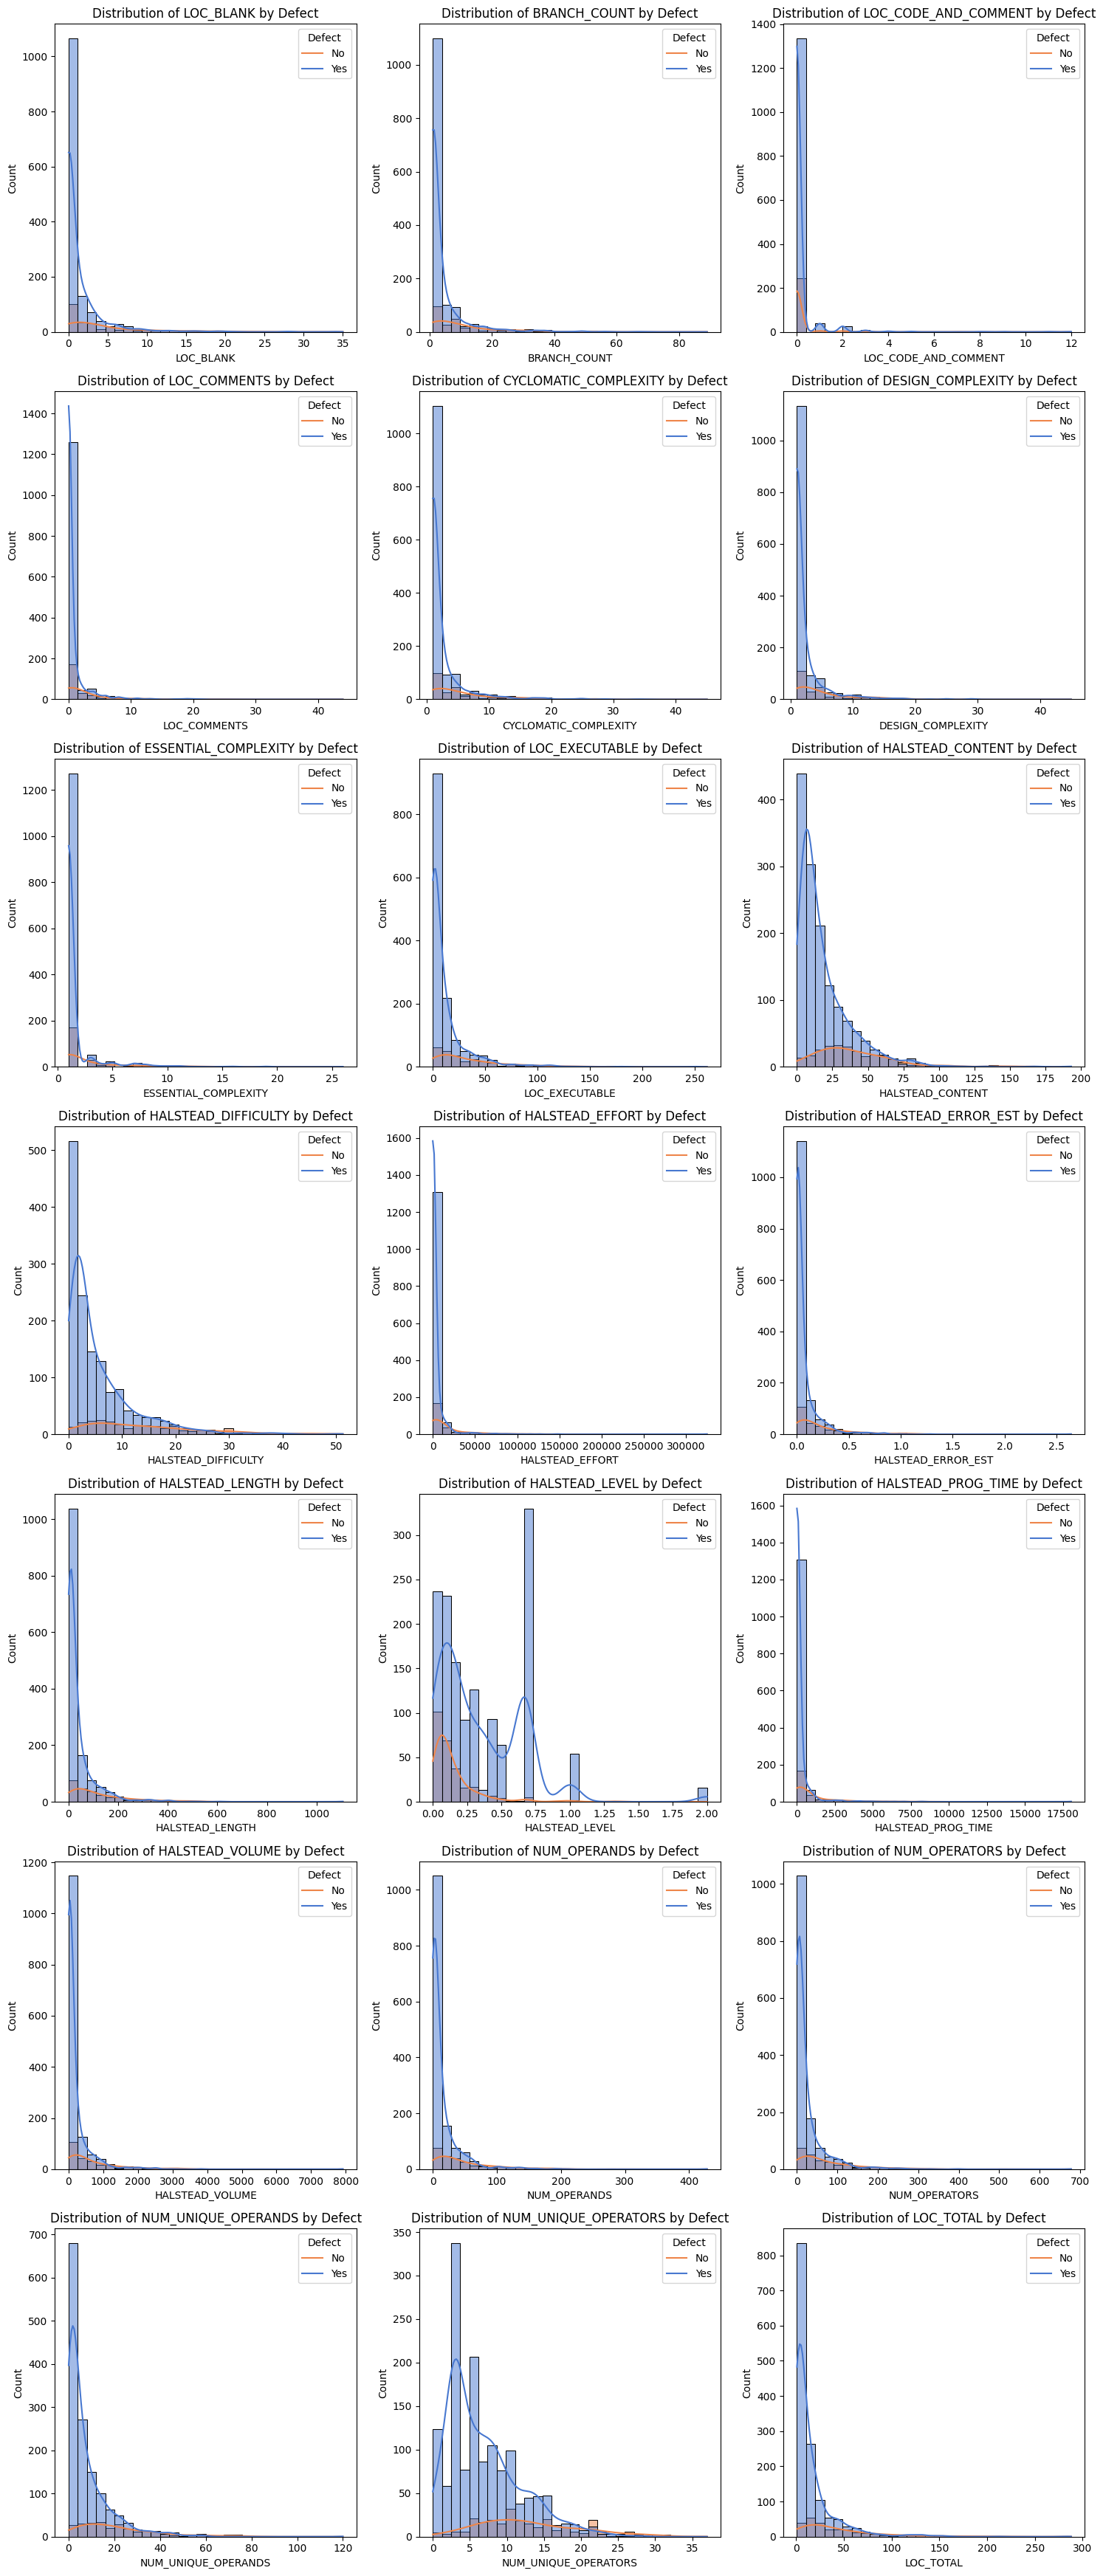

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = train_df.drop(columns=['Index', 'Defect']).columns

# Determine the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=train_df, x=feature, hue='Defect', kde=True, bins=30, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} by Defect')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Defect', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

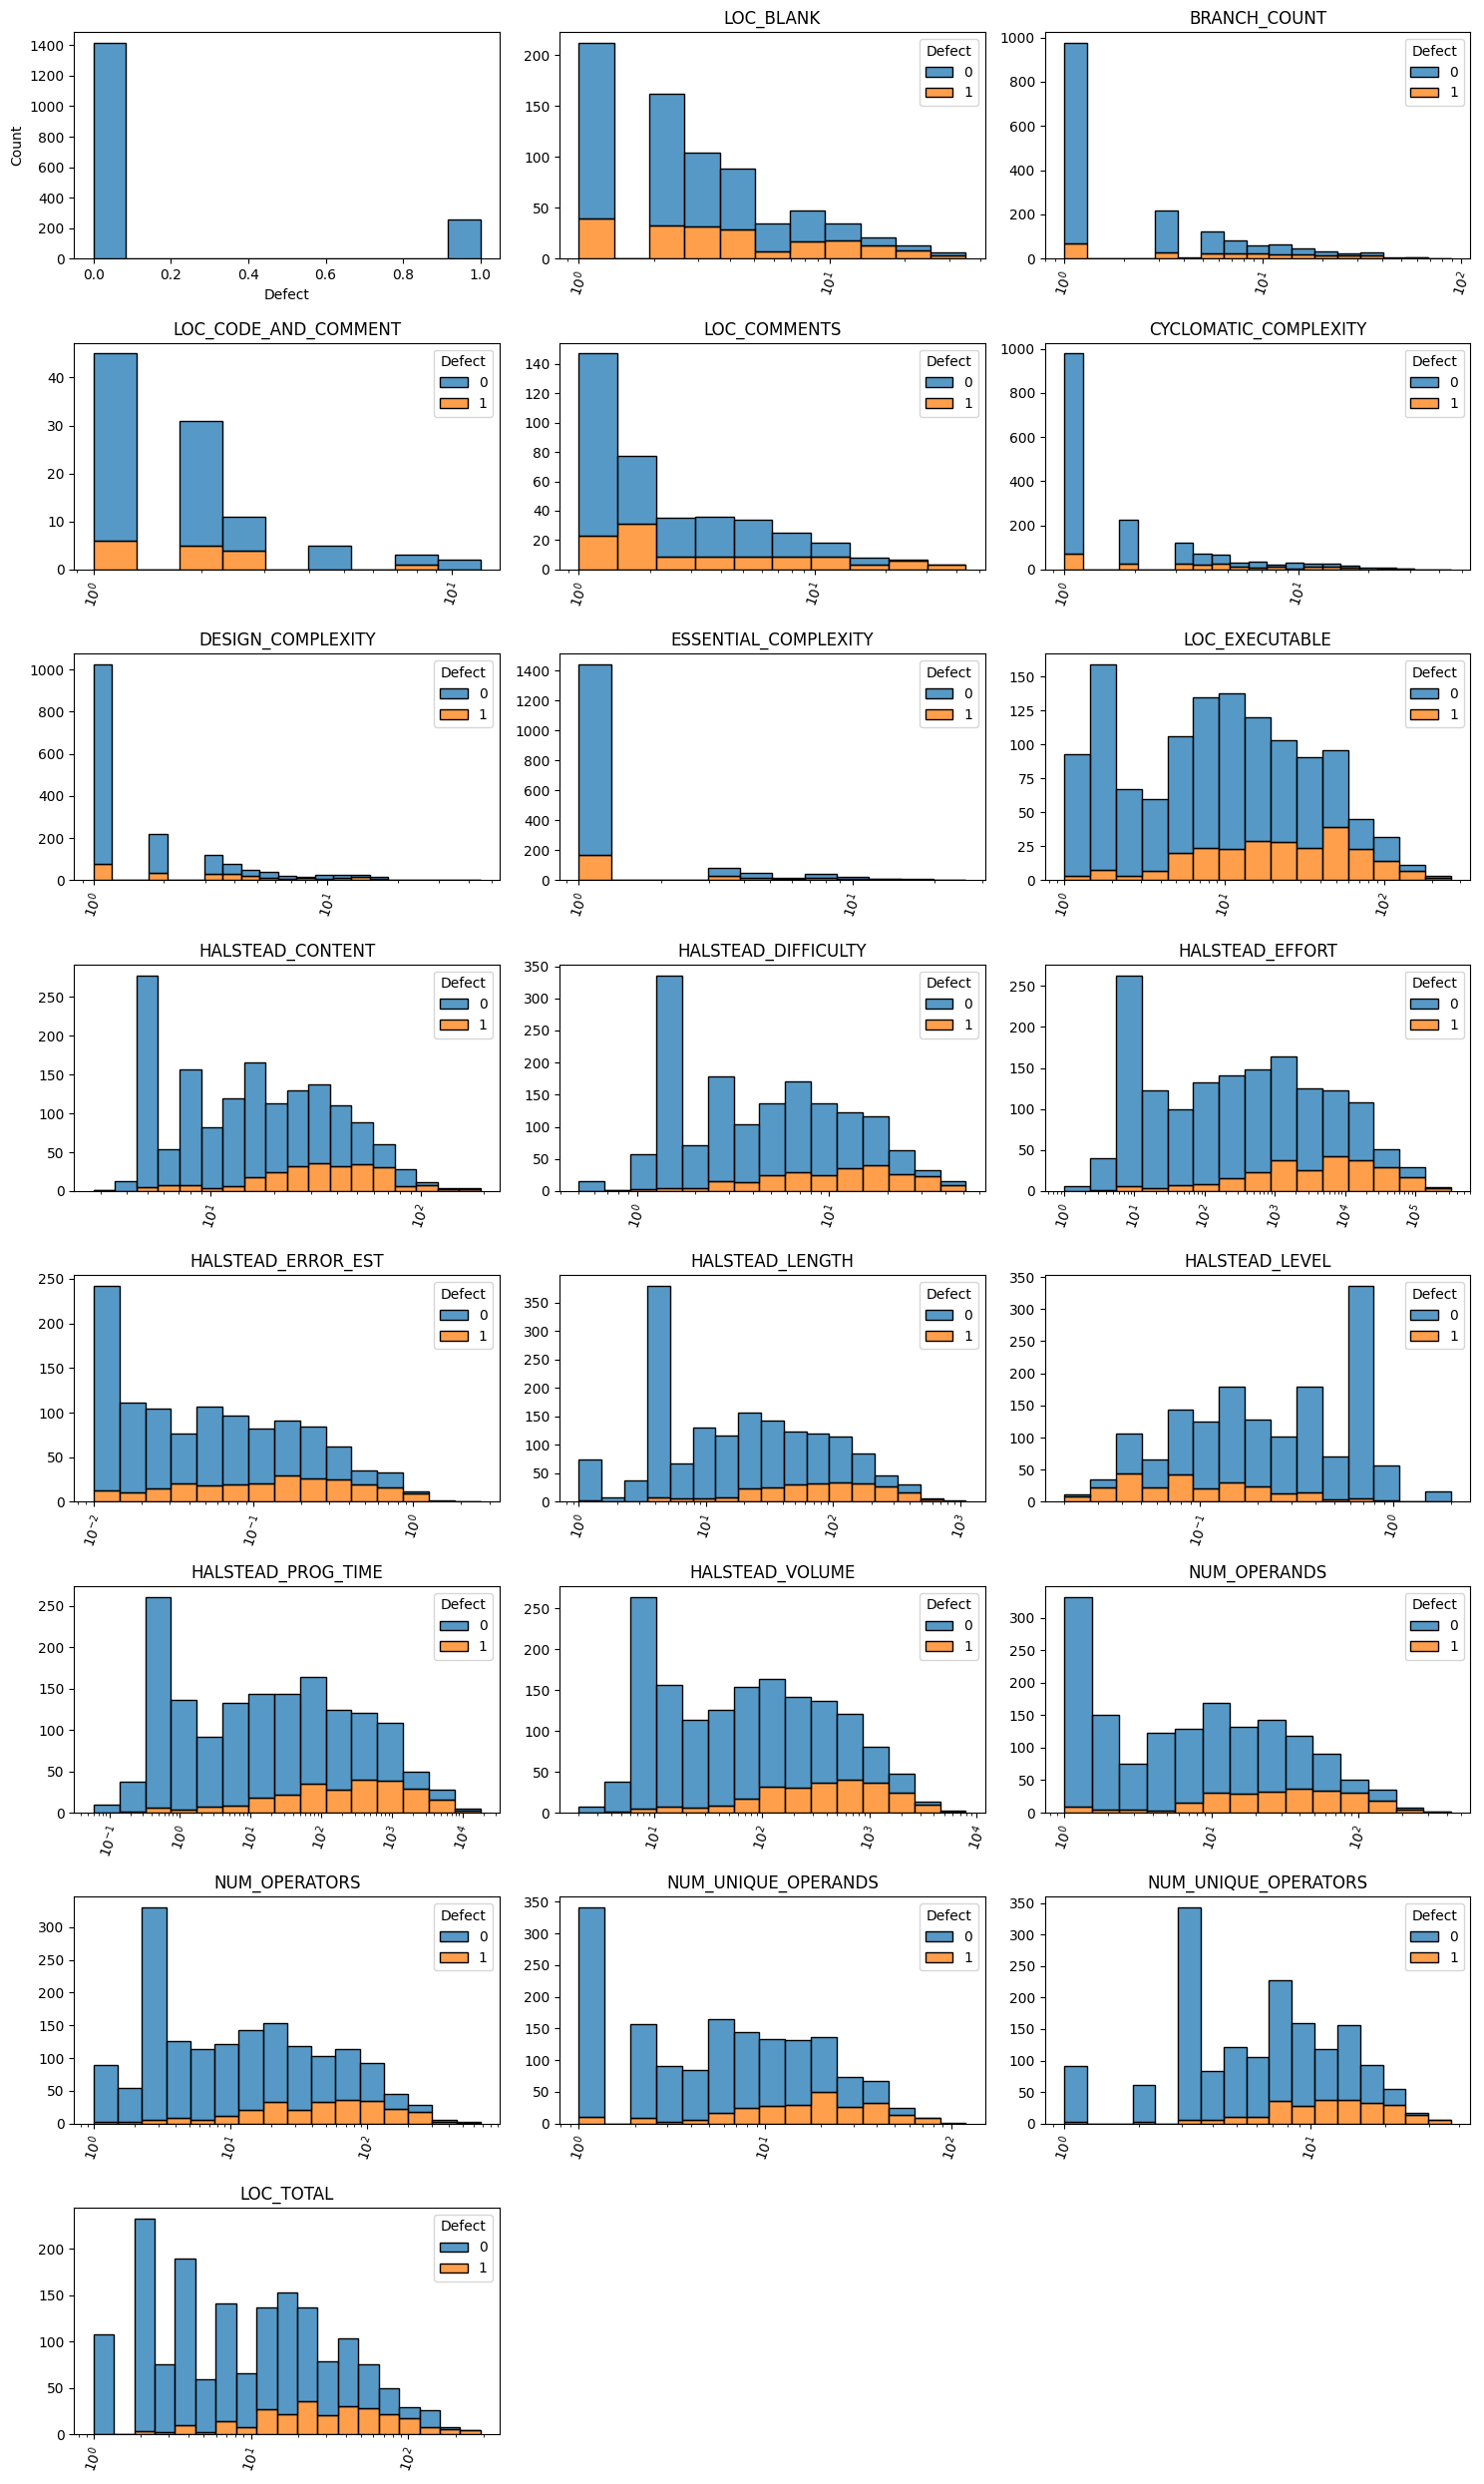

In [ ]:
plt.figure(figsize=(15, 25))

# Define discrete_columns excluding 'Index' and 'Defect'
discrete_columns = [column for column in train_df.columns if column != 'Index' and column != 'Defect']

plt.subplot(8, 3, 1)
sns.histplot(data=train_df, x='Defect')

# Enumerate over discrete_columns and plot histograms
for i, column in enumerate(discrete_columns):
    plt.subplot(8, 3, i + 2)  # Adjusting subplot index to start from 2
    sns.histplot(x=train_df[column], hue=train_df['Defect'], multiple="stack", log_scale=(True, False))
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

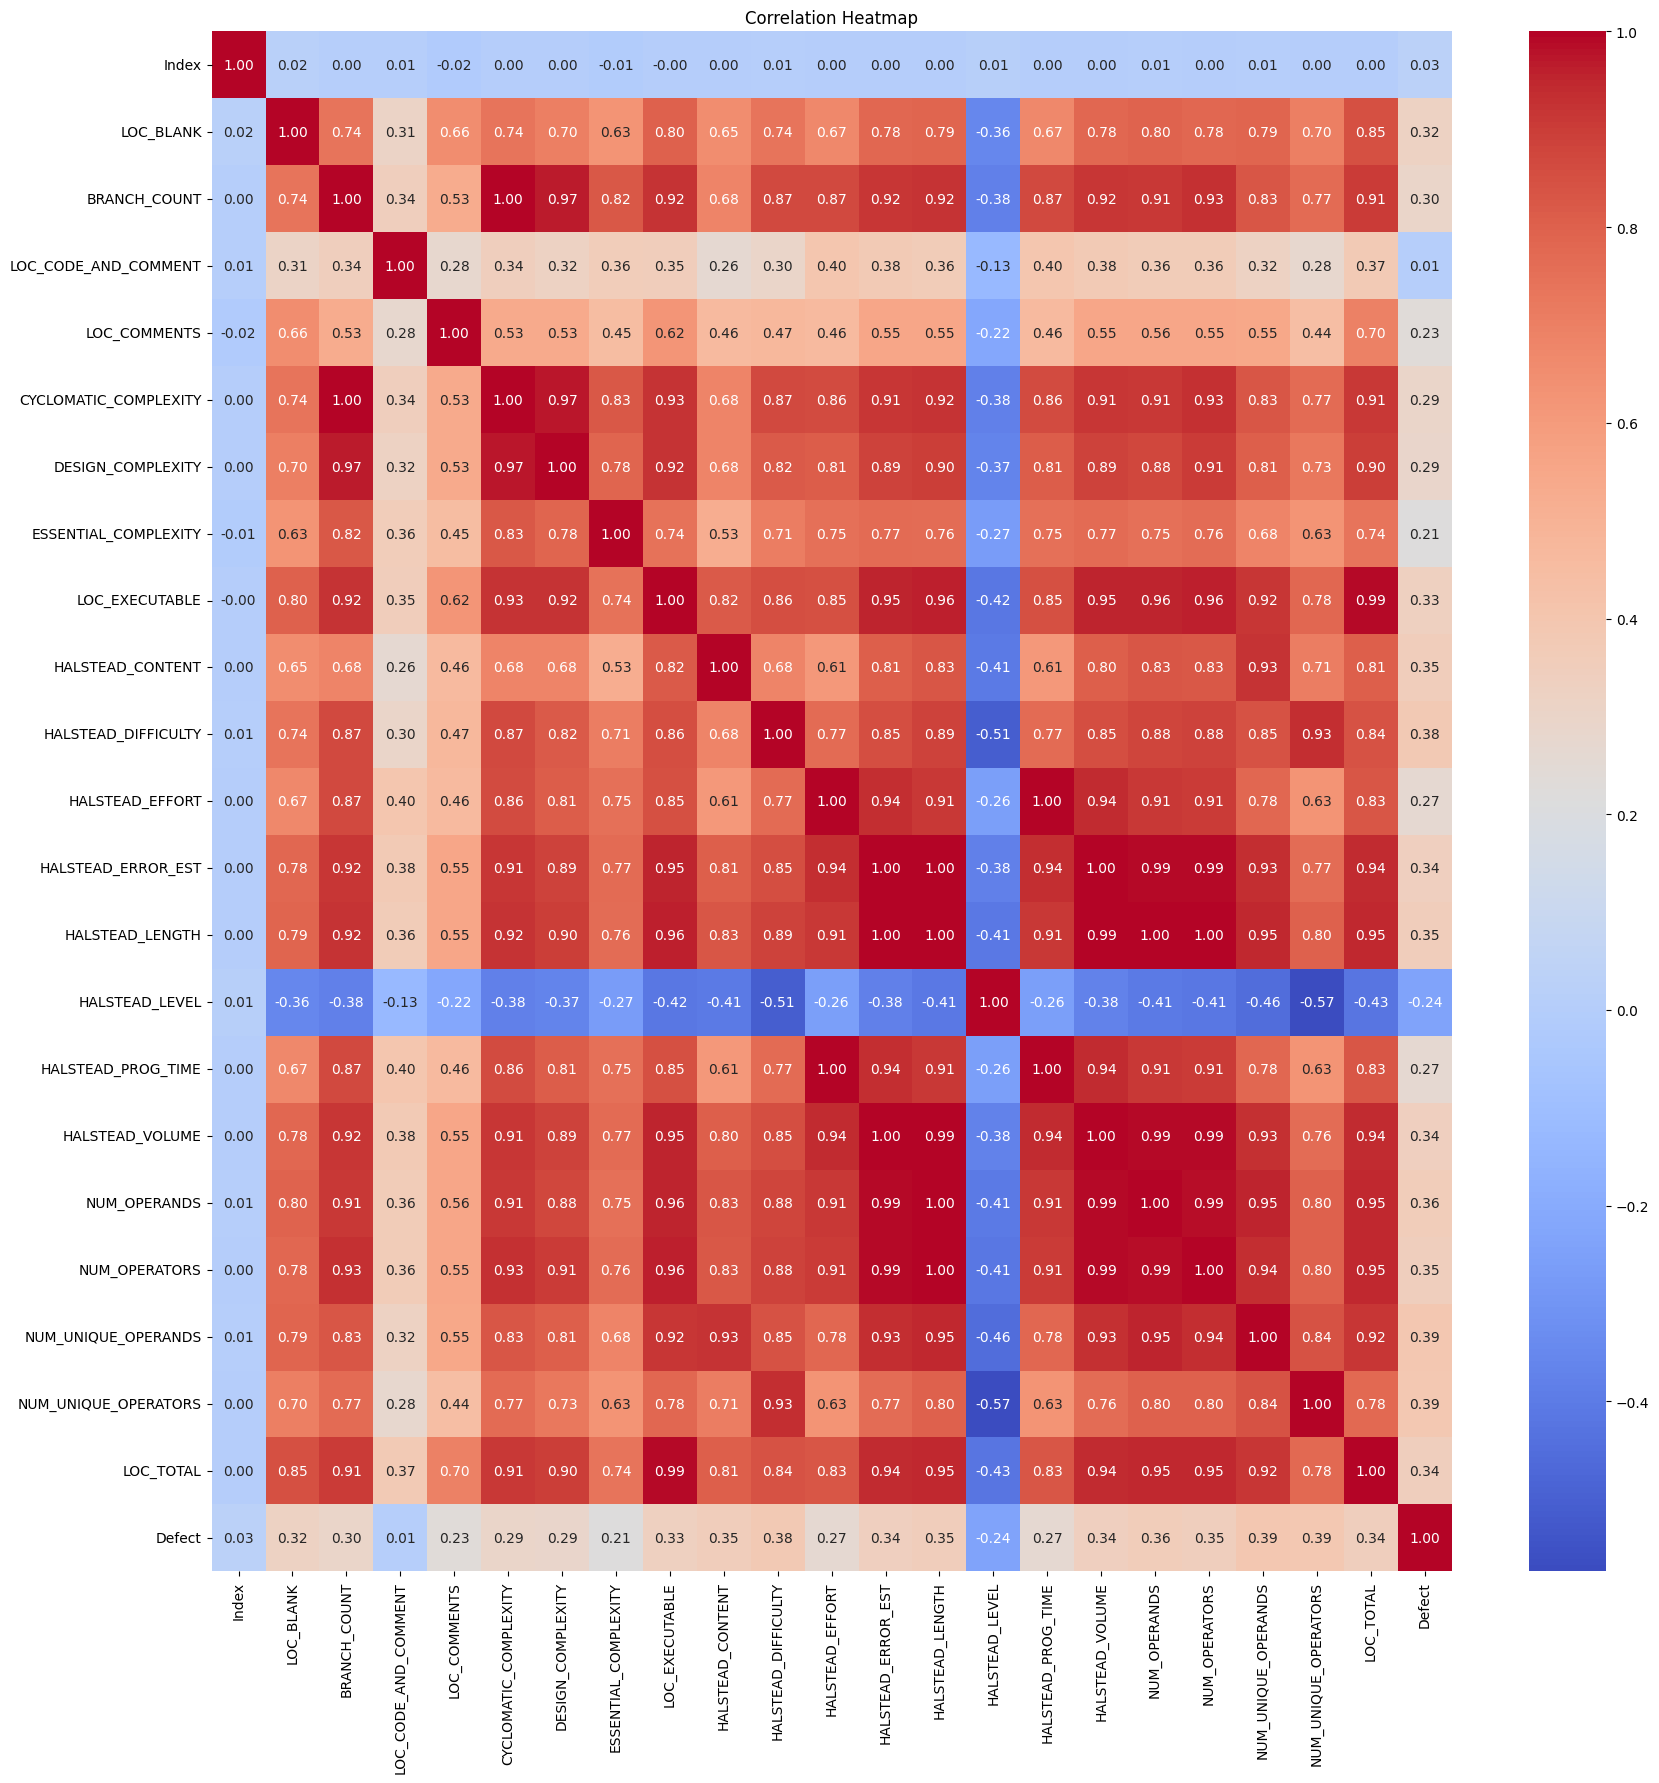

In [ ]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Features Selection:

Analyzing the corr matrix, we can make the following changes:

In [ ]:
#features_to_drop=['HALSTEAD_LENGTH','NUM_OPERATORS','NUM_OPERANDS']
#features_to_drop=[]
#y=train_df['Defect']
#X=train_df.drop(columns=['Defect','Index']+features_to_drop)
#X_eval=test_df.drop(columns=['Index']+features_to_drop)

## Features correction

1. Apply Log/sqrt/... Transformation on Each Feature:
- Log transformation is a common technique used to handle skewed distributions and reduce the variability in data. It can help stabilize the variance and make the data more normally distributed.
- This step involves applying the natural logarithm function to each feature in the dataset.
---
2. Apply Standard Scaling on Each Feature:
- Standard scaling (also known as z-score normalization) is a preprocessing technique that rescales the features to have a mean of 0 and a standard deviation of 1.
- It is important for algorithms that are sensitive to feature scaling, such as gradient descent-based algorithms and support vector machines.
- This step involves standardizing each feature so that they all have the same scale.
---
3. Use Oversampling:
- Oversampling is a technique used to address class imbalance in the dataset, where one class (e.g., defective products) is significantly underrepresented compared to another class (e.g., non-defective products).
- Oversampling involves generating synthetic samples for the minority class to balance the distribution of classes in the dataset.
- This step aims to improve the performance of the model by ensuring that it is trained on a more balanced dataset.

In [ ]:
# Assigning the 'Defect' column to y, which represents the target variable
y = train_df['Defect']

# Assigning the remaining columns (excluding 'Defect' and 'Index') to X, which represents the features
X=train_df.drop(columns=['Defect','Index'])

# Assigning the columns of the test dataframe (excluding 'Index') to X_eval, which represents the features for evaluation
X_eval=test_df.drop(columns=['Index'])

In [ ]:
#Iterate through each column in the train_df DataFrame
#for column in train_df.columns:
    # Check if the column is not 'Index' and not 'Defect'
#    if column != 'Index' and column != 'Defect':
        # Check if the column exists in X DataFrame
#        if column in X.columns:
            # Apply a lambda function to each value in the column to perform a log transformation
            # Adding 1 before taking the log to avoid issues with zero values
#            X[column] = X[column].apply(lambda x: log(x + 1))

        # Check if the column exists in X_eval DataFrame
#        if column in X_eval.columns:
            # Apply the same transformation to the corresponding column in the X_eval DataFrame
#            X_eval[column] = X_eval[column].apply(lambda x: log(x + 1))

In [ ]:
#from math import sqrt
#for column in X.columns:
#   if column != 'Index' and column != 'Defect':
#        X[column]=X[column].apply(lambda x: sqrt(x))
#        X_eval[column]=X_eval[column].apply(lambda x: sqrt(x))

In [ ]:
#scaler=StandardScaler()
#cols=X.columns
#X=pd.DataFrame(scaler.fit_transform(X),columns=cols)
#X_eval=pd.DataFrame(scaler.transform(X_eval),columns=cols)

### Over Sampling techinque for imbalanced data:

- We import the ADASYN oversampling technique from the imbalanced-learn library. ADASYN stands for Adaptive Synthetic Sampling Approach for Imbalanced Learning.

- Defining the over sampling ration:\
ratio = 1.5: defines the oversampling ratio. In this case, it's set to 1.5, indicating that the minority class will be oversampled to have 1.5 times as many samples as the majority class after oversampling.

In [ ]:
import random
random.seed(123)

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1)

# Define oversampling ratio
ratio = 1.5

# Calculate the number of samples for each class after oversampling
count_0, count_1 = y_train.value_counts()
target = {0: int(ratio * count_0), 1: int(ratio * count_1)}

# Create and fit the ADASYN oversampler
adasyn = ADASYN(sampling_strategy=target, n_jobs=-1)
X_train_over, y_train_over = adasyn.fit_resample(X_train, y_train)

---
---
# Model Building


## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rfc=RandomForestClassifier(n_estimators=1000,max_depth=40, random_state=0)
rfc.fit(X_train_over,y_train_over)
y_pred=rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.8484561213434453, 0.12762719329089037, 0.15476190476190477)

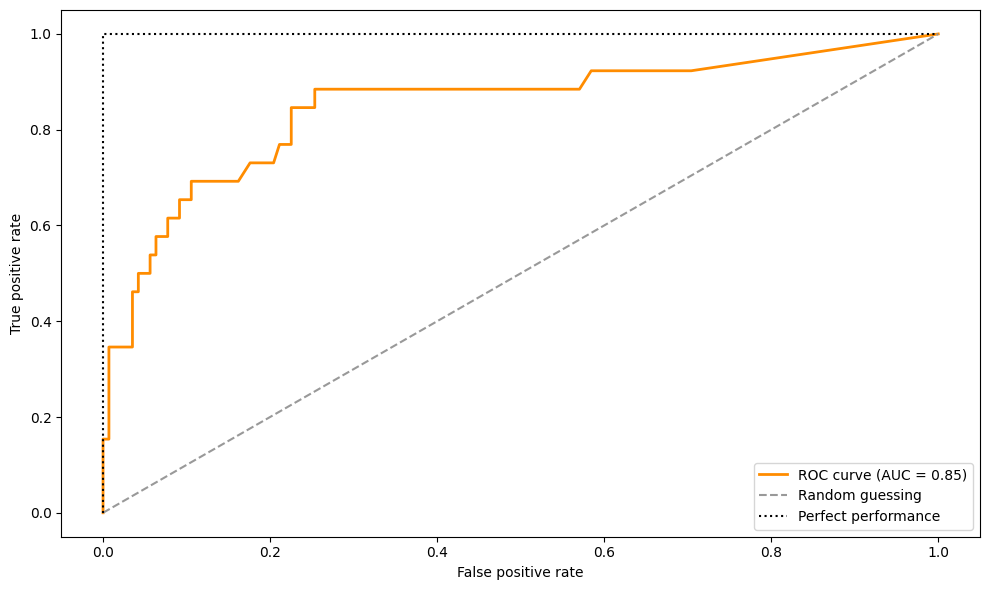

In [ ]:
# Let's plot the roc_auc_score: import the necessary packages
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

---
## Extra Trees classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Let's now implement the Extra Trees classifier:
etc=ExtraTreesClassifier(n_estimators=1000,random_state=0)
etc.fit(X_train_over,y_train_over)
y_pred=etc.predict_proba(X_test)[:,1]

---
## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Let's now implement the gradient boosting classifier:
gbc=GradientBoostingClassifier(n_estimators=1000,max_depth=15,random_state=0)
gbc.fit(X_train_over,y_train_over)
y_pred=gbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.7780335861321775, 0.09031425102720077, 0.15476190476190477)

---
## Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Let's now implement the hist gradient boosting classifier:
hgbc=HistGradientBoostingClassifier(max_iter=1000,max_depth=10,random_state=0)
hgbc.fit(X_train_over,y_train_over)
y_pred=hgbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.7750541711809319, 0.10544057140162574, 0.15476190476190477)

---
## XGboost classifier

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

# Let's now implement the XGboost classifier:
xgbc=xgb.XGBClassifier(n_estimators=1000,max_depth=10,random_state=0)
xgbc.fit(X_train_over,y_train_over)
y_pred=xgbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.7804712892741061, 0.12244288, 0.15476190476190477)

---
## LGBM classifier

In [ ]:
import lightgbm as lgb

# Let's now implement the lightgbm Classifier:
lgbc=lgb.LGBMClassifier(n_estimators=1000,max_depth=10,random_state=0)
lgbc.fit(X_train_over,y_train_over)
y_pred=lgbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

---
## CatBoost classifier

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

# Let's now implement the catboost classifier:
cbc=CatBoostClassifier(n_estimators=1000,max_depth=10,random_state=0)
cbc.fit(X_train_over,y_train_over)
y_pred=cbc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

---
## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Let's now implement the AdaBoost classifier:
abc=AdaBoostClassifier(n_estimators=1000,algorithm="SAMME",random_state=0)
abc.fit(X_train_over,y_train_over)
y_pred=abc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)

(0.8045774647887324, 0.4752628060871179, 0.15476190476190477)

---
## StackingClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42, probability=True))
]

# Initialize StackingClassifier with base estimators and final estimator
stacking_clf = StackingClassifier(estimators=base_estimators,
                                  final_estimator=LogisticRegression(random_state=42))

# Fit the stacking model
stacking_clf.fit(X_train_over, y_train_over)

# Make predictions on the test data
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate mean of predictions and true values
mean_pred = np.mean(y_pred_proba)
mean_true = np.mean(y_test)

# Print evaluation metrics
print("ROC AUC Score:", roc_auc)
print("Mean Predictions:", mean_pred)
print("Mean True Values:", mean_true)

ROC AUC Score: 0.8506229685807151
Mean Predictions: 0.14465933557908356
Mean True Values: 0.15476190476190477


In [ ]:
# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42, probability=True))
]

# Initialize StackingClassifier with base estimators and final estimator
stacking_clf_v1 = StackingClassifier(estimators=base_estimators,
                                  final_estimator=ExtraTreesClassifier(n_estimators=100, random_state=42))

# Fit the stacking model
stacking_clf_v1.fit(X_train_over, y_train_over)

# Make predictions on the test data
y_pred_proba = stacking_clf_v1.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate mean of predictions and true values
mean_pred = np.mean(y_pred_proba)
mean_true = np.mean(y_test)

# Print evaluation metrics
print("ROC AUC Score:", roc_auc)
print("Mean Predictions:", mean_pred)
print("Mean True Values:", mean_true)

ROC AUC Score: 0.812296858071506
Mean Predictions: 0.13679486703772417
Mean True Values: 0.15476190476190477


In [ ]:
# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42, probability=True))
]

# Initialize StackingClassifier with base estimators and final estimator
stacking_clf_v2 = StackingClassifier(estimators=base_estimators,
                                  final_estimator=RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the stacking model
stacking_clf_v2.fit(X_train_over, y_train_over)

# Make predictions on the test data
y_pred_proba = stacking_clf_v2.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate mean of predictions and true values
mean_pred = np.mean(y_pred_proba)
mean_true = np.mean(y_test)

# Print evaluation metrics
print("ROC AUC Score:", roc_auc)
print("Mean Predictions:", mean_pred)
print("Mean True Values:", mean_true)

ROC AUC Score: 0.8236728060671723
Mean Predictions: 0.1427107532063487
Mean True Values: 0.15476190476190477


---
---
# Generate Predictions and Create Submission File

Since the metric of this competition is roc_auc_score, the output will be measured against predicted probabilities and not predicted class.

(ROC is a probability curve. It tells how much the model is capable of distinguishing between classes. It is measured as probability only and not as a class.)

The sample submission shows output as binary output but that should not be followed.

So, our model should use

model.predict_proba(test_data)[:, 1]

and not

model.predict(test_data)

## Predictions for Random Forest

In [ ]:
# Make predictions
predictions = rfc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.2

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

In [ ]:
predictions.shape,np.mean(predictions),np.mean(y)

((419,), 0.13557118336233234, 0.15513126491646778)

In [ ]:
# Convert predictions to DataFrame
predictions_df_rfc = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_rfc.index.name = 'Index'
# Save predictions to CSV
predictions_df_rfc.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/rfc_submission.csv', index=True)

Let's try to vary the threshold...

Indeed it would make sense to put that threshold low since we are dealing with NASA data so any slight increase in the probabilities could lead to a disaster...

In [ ]:
# Make predictions
predictions = rfc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.3

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

In [ ]:
# Convert predictions to DataFrame
predictions_df_rfc_030 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_rfc_030.index.name = 'Index'
# Save predictions to CSV
predictions_df_rfc_030.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/rfc_030_submission.csv', index=True)

Let's try for 0.35 as our threshold...

In [ ]:
# Make predictions
predictions = rfc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.35

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

In [ ]:
# Convert predictions to DataFrame
predictions_df_rfc_035 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_rfc_035.index.name = 'Index'
# Save predictions to CSV
predictions_df_rfc_035.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/rfc_035_submission.csv', index=True)

---
---
##Predictions for Extra Trees Classifier

In [ ]:
# Make predictions
predictions = etc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.3

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

In [ ]:
# Convert predictions to DataFrame
predictions_df_etc_030 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_etc_030.index.name = 'Index'
# Save predictions to CSV
predictions_df_etc_030.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/etc_030_submission.csv', index=True)

Let's try for threshold = 0.15

In [ ]:
# Make predictions
predictions = etc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.1

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

In [ ]:
# Convert predictions to DataFrame
predictions_df_etc_015 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_etc_015.index.name = 'Index'
# Save predictions to CSV
predictions_df_etc_015.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/etc_01_submission.csv', index=True)

Let's try for threshold = 0.20

In [ ]:
# Make predictions
predictions = etc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.20

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0]


---
---
## Predictions for Catboost Classifier

In [ ]:
# Make predictions
predictions = cbc.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]


In [ ]:
# Convert predictions to DataFrame
predictions_df_cbc = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_cbc.index.name = 'Index'
# Save predictions to CSV
predictions_df_cbc.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/cbc_submission.csv', index=True)

---
---
## Predictions for our Stacking Classifier:

In [ ]:
# Make predictions
predictions = stacking_clf.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.15

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0]


In [ ]:
# Convert predictions to DataFrame
predictions_df_stacking_015 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_stacking_015.index.name = 'Index'
# Save predictions to CSV
predictions_df_stacking_015.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/stacking_015_submission.csv', index=True)

In [ ]:
# Make predictions
predictions = stacking_clf.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.20

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0]


In [ ]:
# Convert predictions to DataFrame
predictions_df_stacking_020 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_stacking_020.index.name = 'Index'
# Save predictions to CSV
predictions_df_stacking_020.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_com_v2/stacking_020_submission.csv', index=True)

In [ ]:
# Make predictions
predictions = stacking_clf.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.25

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0]


In [ ]:
# Convert predictions to DataFrame
predictions_df_stacking_025 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_stacking_025.index.name = 'Index'
# Save predictions to CSV
predictions_df_stacking_025.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/stacking_025_submission.csv', index=True)

In [ ]:
# Make predictions
predictions = stacking_clf_v1.predict_proba(X_eval)[:, 1]

# Define threshold
threshold = 0.20

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Print the first five binary predictions
print(binary_predictions[:20])

[0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0]


In [ ]:
# Convert predictions to DataFrame
predictions_df_stackingv1_020 = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_stackingv1_020.index.name = 'Index'
# Save predictions to CSV
predictions_df_stackingv1_020.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/stackingv1_020_submission.csv', index=True)

---
---
---
---

# Some other models and predictions...

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective_rfr(trial):
    params = {'n_estimators':trial.suggest_int('n_estimators',150,200),
              'max_depth':trial.suggest_int('max_depth' ,20,50 , log=True),
              'min_samples_split':trial.suggest_int('min_samples_split', 2 , 5),
              'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1 , 5),
              'max_features':trial.suggest_int('max_features',10,50)}

    rf_classifier = RandomForestClassifier(**params , criterion='gini',random_state=0)
    score = cross_val_score(rf_classifier, X, y, cv=4, scoring='roc_auc',n_jobs=-1).mean()
    return score

In [ ]:
!pip install optuna

In [ ]:
import optuna
study = optuna.create_study(direction='maximize',)
study.optimize(objective_rfr, n_trials=10,show_progress_bar=True,n_jobs=-1)

In [ ]:
params_rfc={'n_estimators': 182, 'max_depth': 23, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 20}

In [ ]:
from imblearn.over_sampling import ADASYN
#Over sampling on the whole dataset
ratio_0,ratio_1=1,1.5
count_0,count_1=y.value_counts()
target={0:int(ratio_0*count_0),1:int(ratio_1*count_1)}
# Creating and fitting the ADASYN oversampler
adasyn = ADASYN(sampling_strategy=target, n_jobs=-1,random_state=42)
X_over,y_over = adasyn.fit_resample(X,y)

rfc=RandomForestClassifier(**params_rfc,criterion='gini')
rfc.fit(X_over,y_over)

---
---
### Balanced Bagging Random Forest...

In [ ]:
# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Oversample the training data
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Train the model
balanced_rf_classifier = BalancedRandomForestClassifier(random_state=42)
balanced_rf_classifier.fit(X_resampled, y_resampled)

# Scale the test features
X_test_scaled = scaler.transform(test_df.drop(columns=['Index']))

# Make predictions on the scaled test data
predictions = balanced_rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Define threshold
threshold = 0.2

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Convert predictions to DataFrame
predictions_df_balanced_rf = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_balanced_rf.index.name = 'Index'

# Save predictions to CSV
predictions_df_balanced_rf.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/balanced_rf_submission.csv', index=True)

---
---
### Exra Trees (on the whole data, pretty good model)

In [44]:
from imblearn.over_sampling import ADASYN
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

sub = pd.read_csv('/content/drive/MyDrive/Kaggle_comp_data/Sample_Submission.csv')

# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Scale the test features
X_test_scaled = scaler.transform(test_df.drop(columns=['Index']))

# Train the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions_et = et_classifier.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file
sub['Defect'] = predictions_et
sub.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/ET_nonBin.csv', index=False)

---
---
### Yet another stacking...

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import ADASYN
import pandas as pd
from xgboost import XGBClassifier

# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Scale the test features
X_test_scaled = scaler.transform(test_df.drop(columns=['Index']))

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=140, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=140, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=140, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=140, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42, probability=True)),
    ('nb', GaussianNB())
]

# Initialize StackingClassifier with base estimators and final estimator
stacking_clf = StackingClassifier(estimators=base_estimators,
                                  final_estimator=LogisticRegression(random_state=42))

# Fit the stacking model
stacking_clf.fit(X_resampled, y_resampled)

# Make predictions on the scaled test data
predictions_stacking_clf = stacking_clf.predict_proba(X_test_scaled)[:, 1]

# Define threshold
threshold = 0.2

# Convert probabilities to binary predictions
binary_predictions_stacking_clf = (predictions_stacking_clf >= threshold).astype(int)

# Convert predictions to DataFrame
predictions_df_stack_clf = pd.DataFrame(binary_predictions_stacking_clf, columns=['Defect'])
predictions_df_stack_clf.index.name = 'Index'

# Save predictions to CSV
predictions_df_stack_clf.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/stacking_V_0.2_submission.csv', index=True)

---
---
### Bootstrapping with Extra Trees...

In [ ]:
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Apply Random Oversampling and ADASYN
oversampler = RandomOverSampler(random_state=42)
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_resampled, y_resampled)

# Perform bootstrap resampling
bootstrap_samples = []
num_samples = 10  # Adjust as needed

for _ in range(num_samples):
    X_boot, y_boot = resample(X_resampled_adasyn, y_resampled_adasyn, random_state=42)
    bootstrap_samples.append((X_boot, y_boot))

# Train multiple Extra Trees classifiers using the bootstrap samples
et_classifiers = []
for X_boot, y_boot in bootstrap_samples:
    et_classifier = ExtraTreesClassifier(n_estimators=50, max_depth=1000, random_state=42)
    et_classifier.fit(X_boot, y_boot)
    et_classifiers.append(et_classifier)

X_test = test_df.drop(columns=['Index'])

# Make predictions on the scaled test data using each classifier
predictions_et = []

for et_classifier in et_classifiers:
    predictions_et.append(et_classifier.predict_proba(X_test)[:, 1])

# Aggregate predictions from all classifiers (e.g., by averaging) and apply the threshold
average_predictions = sum(predictions_et) / len(predictions_et)
threshold = 0.20
binary_predictions_et = (average_predictions >= threshold).astype(int)

# Convert predictions to DataFrame
predictions_df_et = pd.DataFrame(binary_predictions_et, columns=['Defect'])
predictions_df_et.index.name = 'Index'

# Save predictions to CSV
predictions_df_et.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/et_bootstrap_resampling_adasyn_submission.csv', index=True)

---
---
### Ada Boost (very bad idk why I'm getting only ones in my predictions)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, ADASYN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Feature Scaling
scaler = StandardScaler()
X_resampled_adasyn_scaled = scaler.fit_transform(X_train)

# Train the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train, y_train)

X_test = test_df.drop(columns=['Index'])

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the scaled test data
predictions_adaboost = adaboost_classifier.predict_proba(X_test_scaled)[:, 1]

# Define threshold
threshold = 0.20

# Convert probabilities to binary predictions
binary_predictions_adaboost = (predictions_adaboost >= threshold).astype(int)

# Convert predictions to DataFrame
predictions_df_adaboost = pd.DataFrame(binary_predictions_adaboost, columns=['Defect'])
predictions_df_adaboost.index.name = 'Index'

# Save predictions to CSV
predictions_df_adaboost.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/ada_submission.csv', index=True)

---
---
### Balanced Bagging Stacking...

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import BalancedBaggingClassifier
import pandas as pd

# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42, probability=True)),
]

# Initialize StackingClassifier with base estimators and final estimator
stacking_clf = StackingClassifier(estimators=base_estimators,
                                  final_estimator=RandomForestClassifier(random_state=42))

# Fit the stacking model
stacking_clf.fit(X_resampled, y_resampled)

# Scale the test features
X_test_scaled = scaler.transform(test_df.drop(columns=['Index']))

# Initialize BalancedBaggingClassifier with base estimators
balanced_bagging_clf = BalancedBaggingClassifier(base_estimator=stacking_clf, sampling_strategy='auto', replacement=False, random_state=42)

# Fit the balanced bagging model
balanced_bagging_clf.fit(X_resampled, y_resampled)

# Make predictions on the scaled test data
predictions_balanced_bagging = balanced_bagging_clf.predict_proba(X_test_scaled)[:, 1]

# Define threshold
threshold = 0.3

# Convert probabilities to binary predictions
binary_predictions_balanced_bagging = (predictions_balanced_bagging >= threshold).astype(int)

# Convert predictions to DataFrame
predictions_df_balanced_bagging = pd.DataFrame(binary_predictions_balanced_bagging, columns=['Defect'])
predictions_df_balanced_bagging.index.name = 'Index'

# Save predictions to CSV
predictions_df_balanced_bagging.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/bbc_stacking_submission.csv', index=True)

---
---
### Random Forest, Nested CV and Gridsearch...

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Separate features and target variable
X = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y = train_df['Defect']

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize outer cross-validation loop
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation with GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

nested_scores = cross_val_score(grid_search, X, y, cv=outer_cv, scoring='roc_auc')

# Print nested cross-validation results
print("Nested CV ROC AUC scores:", nested_scores)
print("Mean nested CV ROC AUC:", nested_scores.mean())

# Fit the model on the entire dataset with the best parameters
best_rf_classifier = grid_search.fit(X, y).best_estimator_

# Make predictions on the test dataset
predictions_test_proba = best_rf_classifier.predict_proba(test_df.drop(columns=['Index']))[:, 1]

# Define threshold for binary classification
threshold = 0.2

# Convert probabilities to binary predictions using the threshold
binary_predictions_test = (predictions_test_proba >= threshold).astype(int)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame(binary_predictions_test, columns=['Defect'])
predictions_df.index.name = 'Index'

# Save predictions to CSV
predictions_df.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/rf_CV_gridsearch_0.2_submission.csv', index=True)

Nested CV ROC AUC scores: [0.84216484 0.79430065 0.74873377 0.82806386 0.80850755]
Mean nested CV ROC AUC: 0.8043541337194432


---
### With over sampling this time...

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
import pandas as pd

# Separate features and target variable
X = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y = train_df['Defect']

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize outer cross-validation loop
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation with GridSearchCV
nested_scores = []
for train_index, test_index in outer_cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply ADASYN oversampling to the training data
    ada = ADASYN(random_state=42)
    X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

    # Initialize GridSearchCV with resampled training data
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

    # Fit GridSearchCV to the resampled training data
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Evaluate model on the original test data
    nested_score = grid_search.score(X_test, y_test)
    nested_scores.append(nested_score)

# Print nested cross-validation results
print("Nested CV ROC AUC scores:", nested_scores)
print("Mean nested CV ROC AUC:", sum(nested_scores) / len(nested_scores))

# Fit the model on the entire dataset with the best parameters
best_rf_classifier = grid_search.fit(X, y).best_estimator_

# Make predictions on the test dataset
predictions_test_proba = best_rf_classifier.predict_proba(test_df.drop(columns=['Index']))[:, 1]

# Define threshold for binary classification
threshold = 0.2

# Convert probabilities to binary predictions using the threshold
binary_predictions_test = (predictions_test_proba >= threshold).astype(int)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame(binary_predictions_test, columns=['Defect'])
predictions_df.index.name = 'Index'

# Save predictions to CSV
predictions_df.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/rf__oversamp_CV_gridsearch_0.2_submission.csv', index=True)

Nested CV ROC AUC scores: [0.8423790001835648, 0.7802804048448648, 0.7296753246753247, 0.8005805881610502, 0.7975464576074333]
Mean nested CV ROC AUC: 0.7900923550944475


---
---
### Let's try to make the best CV and gridsearch possible even if it will take more computational time...

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN

np.random.seed(42)

# Load data
train_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Features.csv')
train_output_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Output.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Test_Features.csv')
sub = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Sample_Submission.csv')

# Drop index column
train_df.drop('Index', axis=1, inplace=True)
train_output_df.drop('Index', axis=1, inplace=True)
test_df.drop('Index', axis=1, inplace=True)

# Perform sampling techniques on features and labels
oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()
smote = SMOTE()
#adasyn = ADASYN()

# Resample features
X_resampled, y_resampled = oversampler.fit_resample(train_df, train_output_df)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)
#X_resampled, y_resampled = adasyn.fit_resample(X_resampled, y_resampled)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=5)

# Define the hyperparameters grid (for gridsearch)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Perform grid search cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

# Get the best model
best_rf_clf = grid_search_rf.best_estimator_

# Fit the model with the best parameters
best_rf_clf.fit(X_train, y_train)

# Make predictions
predictions = best_rf_clf.predict_proba(test_df)[:, 1]

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
# Save predictions to a CSV file
sub['Defect'] = predictions
sub.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/rf_best.csv', index=False)

---
---
### Extra Trees (non binary) on oversampled data...

In [45]:
from imblearn.over_sampling import ADASYN
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

sub = pd.read_csv('/content/drive/MyDrive/Kaggle_comp_data/Sample_Submission.csv')

# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Scale the test features
X_test_scaled = scaler.transform(test_df.drop(columns=['Index']))

# Train the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_resampled, y_resampled)

# Make predictions on the scaled test data
predictions_et = et_classifier.predict_proba(X_test_scaled)[:, 1]

# Save predictions to a CSV file
sub['Defect'] = predictions_et
sub.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/ET_OVER_nonBin.csv', index=False)

---
---

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN

np.random.seed(42)

# Load data
train_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Features.csv')
train_output_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Output.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Test_Features.csv')
sub = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Sample_Submission.csv')

# Drop index column
train_df.drop('Index', axis=1, inplace=True)
train_output_df.drop('Index', axis=1, inplace=True)
test_df.drop('Index', axis=1, inplace=True)

# Perform sampling techniques on features and labels
oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()
smote = SMOTE()
#adasyn = ADASYN()

# Resample features
X_resampled, y_resampled = oversampler.fit_resample(train_df, train_output_df)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)
#X_resampled, y_resampled = adasyn.fit_resample(X_resampled, y_resampled)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the Random Forest classifier
et_clf = ExtraTreesClassifier(random_state=5)

# Define the hyperparameters grid (for gridsearch)
param_grid_et_clf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Perform grid search cross-validation
grid_search_et_clf = GridSearchCV(rf, param_grid_et_clf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_et_clf.fit(X_train, y_train)

# Get the best parameters
best_params_et_clf = grid_search_et_clf.best_params_
print("Best parameters for Random Forest:", best_params_et_clf)

# Get the best model
best_params_et_clf = grid_search_et_clf.best_estimator_

# Fit the model with the best parameters
best_params_et_clf.fit(X_train, y_train)

# Make predictions
predictions = best_params_et_clf.predict_proba(test_df)[:, 1]

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [51]:
sub['Defect'] = predictions
sub.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/ET_gridCV_nonBin.csv', index=False)